In [ ]:
import duckdb
import time
import sys
from datetime import datetime
import requests

file_path = "../data/2022big.parquet"

result1 = duckdb.query(f"""SELECT x, y, COUNT(*) AS coordinate_count
                        FROM '{file_path}'
                        GROUP BY x, y
                        ORDER BY coordinate_count DESC
                        LIMIT 10;""")
                      
df1 = result1.to_df()
print(df1)


      x     y  coordinate_count
0     0     0             98807
1   359   564             69198
2   349   564             55230
3   859   766             52261
4   860   766             51485
5   104   768             38086
6   105   768             34082
7  1999  1999             31437
8  1999     0             30882
9   633   728             30752


In [8]:
def get_color_name(hex_color):
    url = f"https://www.thecolorapi.com/id?hex={hex_color.lstrip('#')}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data.get("name", {}).get("value", "Unknown")
        else:
            return "Unknown"
    except Exception as e:
        return "Unknown"

In [ ]:
result2 = duckdb.query(f"""SELECT pixel_color, COUNT (*) as color_count
                        FROM '{file_path}'
                        WHERE x == 0 and y == 0
                        GROUP BY pixel_color
                        ORDER BY color_count DESC;""")
df2 = result2.to_df()

df2['color_name'] = df2['pixel_color'].apply(get_color_name)

print(df2)

   pixel_color  color_count           color_name
0      #FFFFFF        59282                White
1      #000000         8715                Black
2      #FF4500         4209            Vermilion
3      #811E9F         2200               Seance
4      #BE0039         2189                Monza
5      #51E9F4         2105                Spray
6      #D4D7D9         2104                 Iron
7      #7EED56         1910             Inchworm
8      #FF99AA         1692               Salmon
9      #2450A4         1567           Denim Blue
10     #FF3881         1427      Sasquatch Socks
11     #FFD635         1172           Bright Sun
12     #00A368         1093           Green Haze
13     #3690EA          977          Picton Blue
14     #493AC1          974     Ocean Blue Pearl
15     #B44AC0          899              Fuchsia
16     #6D001A          817         Venetian Red
17     #FFA800          780           Web Orange
18     #00CC78          672      Caribbean Green
19     #DE107F      

In [10]:
result3 = duckdb.query(f"""SELECT pixel_color, COUNT (*) as color_count
                        FROM '{file_path}'
                        WHERE x == 359 and y == 564
                        GROUP BY pixel_color
                        ORDER BY color_count DESC;""")
df3 = result3.to_df()

df3['color_name'] = df3['pixel_color'].apply(get_color_name)

print(df3)

   pixel_color  color_count           color_name
0      #000000        34726                Black
1      #51E9F4        26940                Spray
2      #FF4500         1656            Vermilion
3      #FFFFFF         1391                White
4      #3690EA          860          Picton Blue
5      #BE0039          680                Monza
6      #FFD635          357           Bright Sun
7      #00CCC0          343     Robin's Egg Blue
8      #2450A4          288           Denim Blue
9      #7EED56          236             Inchworm
10     #811E9F          201               Seance
11     #FF3881          190      Sasquatch Socks
12     #FF99AA          179               Salmon
13     #493AC1          139     Ocean Blue Pearl
14     #FFA800          127           Web Orange
15     #D4D7D9          119                 Iron
16     #B44AC0          110              Fuchsia
17     #00A368           84           Green Haze
18     #6A5CFF           77            Blueberry
19     #898D90      

In [13]:
result4 = duckdb.query(f"""SELECT pixel_color, COUNT (*) as color_count
                        FROM '{file_path}'
                        WHERE x == 349 and y == 564
                        GROUP BY pixel_color
                        ORDER BY color_count DESC
                        LIMIT 5;""")
df4 = result4.to_df()

df4['color_name'] = df4['pixel_color'].apply(get_color_name)

print(df4)

  pixel_color  color_count color_name
0     #000000        27804      Black
1     #51E9F4        19404      Spray
2     #FF4500         2120  Vermilion
3     #FFFFFF         1512      White
4     #BE0039          846      Monza


/var/folders/wn/1h4z_5y959g0lxlcphs4q6bc0000gn/T/ipykernel_4510/4077850949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color_count', y='color_name', data=df4, palette=pixel_color)


<Axes: xlabel='color_count', ylabel='color_name'>

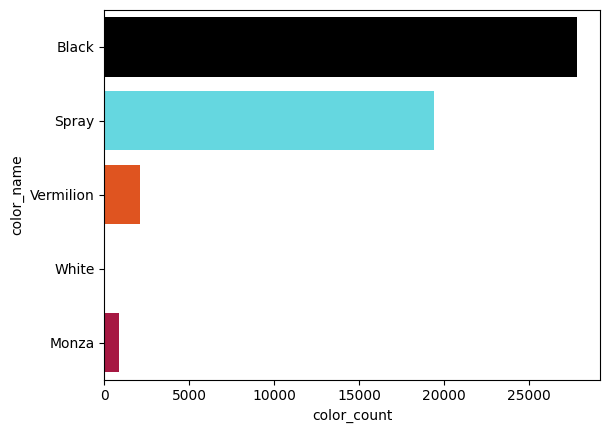

In [22]:
import seaborn as sns
pixel_color = df4["pixel_color"].to_list()

sns.barplot(x='color_count', y='color_name', data=df4, palette=pixel_color)

/var/folders/wn/1h4z_5y959g0lxlcphs4q6bc0000gn/T/ipykernel_4510/1692287342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color_count', y='color_name', data=df3, palette=pixel_color)


<Axes: xlabel='color_count', ylabel='color_name'>

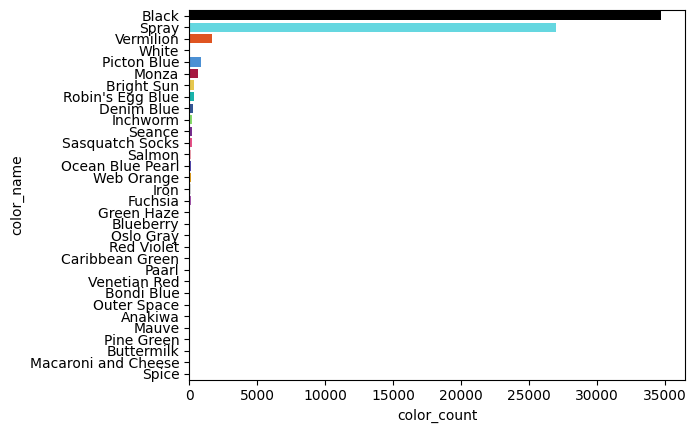

In [23]:
import seaborn as sns
pixel_color = df3["pixel_color"].to_list()

sns.barplot(x='color_count', y='color_name', data=df3, palette=pixel_color)

In [ ]:
import pandas as pd
result5 = duckdb.query(f"""SELECT x, y, COUNT(*) AS coordinate_count
                        FROM '{file_path}'
                        GROUP BY x, y
                        ORDER BY coordinate_count DESC
                        LIMIT 3;""")
                      
top_pixels = result5.to_df()
time_series_data = pd.DataFrame()

# Dictionary to store time-series data for each top pixel
time_series_dict = {}

for _, row in top_pixels.iterrows():
    x, y = row["x"], row["y"]
    
    result = duckdb.query(f"""
        SELECT 
            date_trunc('day', timestamp) as time, 
            pixel_color, 
            COUNT(*) as count
        FROM '{file_path}'
        WHERE x = {x} AND y = {y}
        GROUP BY time, pixel_color
        ORDER BY time
        LIMIT 3;
    """)
    
    # Fetch data and store in a dictionary
    time_series_dict[(x, y)] = result.to_df()

# Display sample of one pixel's time series
for key, df in time_series_dict.items():
    print(f"\nPixel Location: {key}")
    print(df.head())
    break  # Print only the first one


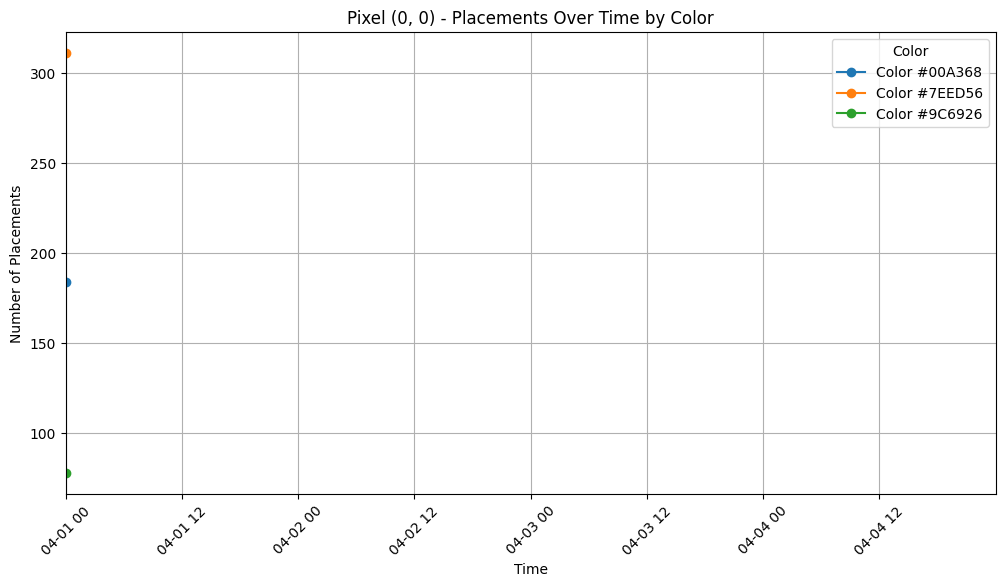

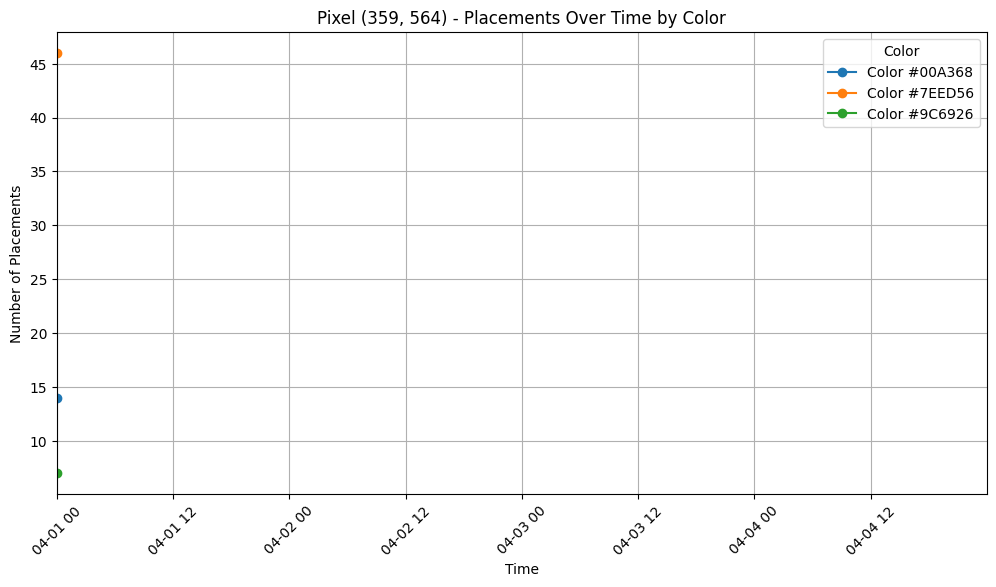

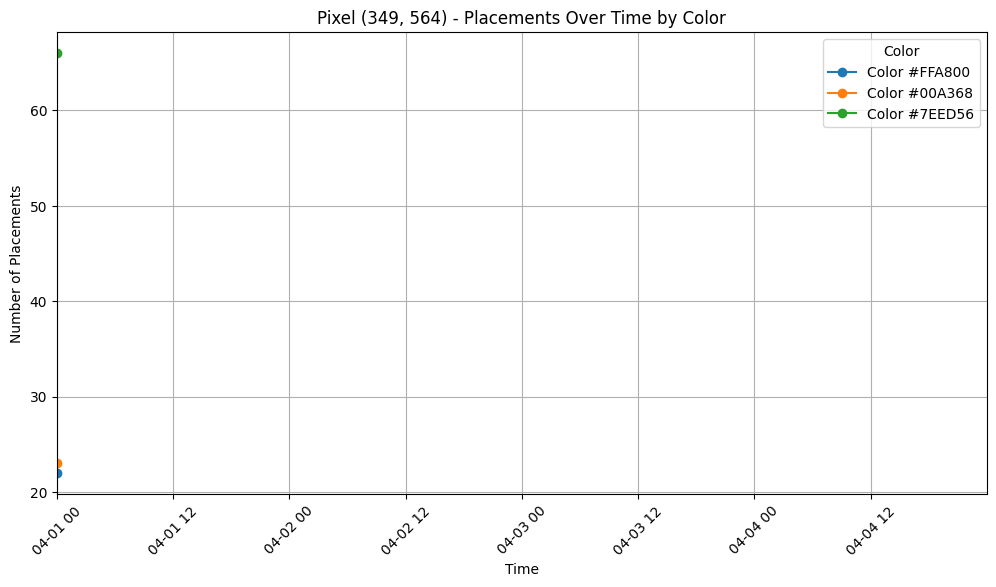

In [47]:
# Create a separate plot for each top pixel

import matplotlib.pyplot as plt 

start_date = pd.Timestamp("2022-04-01 00:00:00")
end_date = pd.Timestamp("2022-04-04 23:59:59")

for (x, y), df in time_series_dict.items():
    plt.figure(figsize=(12, 6))

    # Plot each color as a separate line
    for color in df["pixel_color"].unique():
        subset = df[df["pixel_color"] == color]
        plt.plot(subset["time"], subset["count"], marker="o", linestyle="-", label=f"Color {color}")

    # Formatting
    plt.xlabel("Time")
    plt.ylabel("Number of Placements")
    plt.title(f"Pixel ({x}, {y}) - Placements Over Time by Color")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title="Color")

    plt.xlim(start_date, end_date)

    # Show plot
    plt.show()
